In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
import os

In [8]:
import keras
from keras_unet.models import custom_unet


In [9]:
DATAPATH = '/raid/mpsych/CACTAS/DATA/Nathan Arnett Calcification/'
images_file = os.path.join(DATAPATH, 'images.npy')
labels_file = os.path.join(DATAPATH, 'labels.npy')

In [10]:
images = np.load(images_file)
labels = np.load(labels_file)

In [11]:
# full dataset does not have the last channel
images = images.reshape(images.shape[0],images.shape[1],images.shape[2],1)
labels = labels.reshape(labels.shape[0],labels.shape[1],labels.shape[2],1)

In [12]:
p = np.random.permutation(len(images))

In [13]:
images = images[p]
labels = labels[p]

In [14]:
labels = labels.astype(np.float64)

In [15]:
images = images.astype(np.float64)

for i in range(images.shape[0]):
    
    images[i] = (images[i] - images[i].min()) / (images[i].max() - images[i].min()) # normalize individually
    

In [16]:
images.shape

(503, 512, 512, 1)

In [17]:
X_train = images[0:300]
y_train = labels[0:300]
X_val = images[300:400]
y_val = labels[300:400]
X_test = images[400:]
y_test = labels[400:]

In [18]:

model = custom_unet(
    input_shape=(512, 512, 1),
    use_batch_norm=False,
    num_classes=1,
    filters=32,
    dropout=0.5,
    output_activation='sigmoid')

2023-01-06 16:38:30.291947: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-01-06 16:38:30.426782: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-01-06 16:38:30.426891: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-01-06 16:38:30.430411: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-01-06 16:38:30.430444: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-01-06 16:38:30.431418: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2

In [19]:
import keras.optimizers
from keras_unet.metrics import iou, iou_thresholded
from keras_unet.losses import jaccard_distance

In [20]:
opt = keras.optimizer_v1.Adam(lr=0.01)

In [21]:
model.compile(optimizer = 'Adam',    
              loss='binary_crossentropy', 
              metrics=[iou, iou_thresholded])

In [22]:
history = model.fit(X_train, 
                    y_train, 
                    32, 
                    epochs=100,
                    validation_data=(X_val, y_val))

2023-01-06 16:38:42.862103: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-01-06 16:38:42.881177: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245645000 Hz


Epoch 1/100


2023-01-06 16:38:44.083621: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-01-06 16:38:44.695181: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-01-06 16:38:45.345184: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-01-06 16:38:45.345211: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-01-06 16:38:45.345277: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-01-06 16:38:45.415779: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-01-06 16:38:46.111954: I tensorflow/stream_exec

10/10 [==============================] - 20s 972ms/step - loss: 0.1802 - iou: 8.9614e-05 - iou_thresholded: 5.8076e-04 - val_loss: 0.0167 - val_iou: 5.9285e-05 - val_iou_thresholded: 0.0043
Epoch 2/100
10/10 [==============================] - 3s 329ms/step - loss: 0.0223 - iou: 7.4004e-05 - iou_thresholded: 6.7997e-04 - val_loss: 0.0065 - val_iou: 2.8499e-04 - val_iou_thresholded: 0.0043
Epoch 3/100
10/10 [==============================] - 3s 326ms/step - loss: 0.0099 - iou: 1.0319e-04 - iou_thresholded: 6.3466e-04 - val_loss: 0.0113 - val_iou: 3.6704e-04 - val_iou_thresholded: 0.0043
Epoch 4/100
10/10 [==============================] - 3s 326ms/step - loss: 0.0045 - iou: 1.8902e-04 - iou_thresholded: 6.4801e-04 - val_loss: 0.0213 - val_iou: 6.9511e-04 - val_iou_thresholded: 0.0043
Epoch 5/100
10/10 [==============================] - 3s 326ms/step - loss: 0.0033 - iou: 3.6322e-04 - iou_thresholded: 6.4113e-04 - val_loss: 0.0151 - val_iou: 6.9970e-04 - val_iou_thresholded: 0.0043
Epoch 

Epoch 43/100
10/10 [==============================] - 3s 327ms/step - loss: 0.0013 - iou: 0.0116 - iou_thresholded: 6.1509e-04 - val_loss: 0.0027 - val_iou: 0.0137 - val_iou_thresholded: 0.0043
Epoch 44/100
10/10 [==============================] - 3s 327ms/step - loss: 0.0013 - iou: 0.0120 - iou_thresholded: 6.3939e-04 - val_loss: 0.0026 - val_iou: 0.0153 - val_iou_thresholded: 0.0043
Epoch 45/100
10/10 [==============================] - 3s 327ms/step - loss: 0.0013 - iou: 0.0123 - iou_thresholded: 6.0845e-04 - val_loss: 0.0064 - val_iou: 0.0093 - val_iou_thresholded: 0.0043
Epoch 46/100
10/10 [==============================] - 3s 323ms/step - loss: 0.0013 - iou: 0.0139 - iou_thresholded: 6.3308e-04 - val_loss: 0.0032 - val_iou: 0.0149 - val_iou_thresholded: 0.0043
Epoch 47/100
10/10 [==============================] - 3s 323ms/step - loss: 0.0013 - iou: 0.0157 - iou_thresholded: 6.4673e-04 - val_loss: 0.0019 - val_iou: 0.0199 - val_iou_thresholded: 0.0043
Epoch 48/100
10/10 [==========

Epoch 85/100
10/10 [==============================] - 3s 326ms/step - loss: 5.3375e-04 - iou: 0.2591 - iou_thresholded: 0.3692 - val_loss: 5.9730e-04 - val_iou: 0.1909 - val_iou_thresholded: 0.4479
Epoch 86/100
10/10 [==============================] - 3s 326ms/step - loss: 5.2139e-04 - iou: 0.2578 - iou_thresholded: 0.3845 - val_loss: 4.8226e-04 - val_iou: 0.2505 - val_iou_thresholded: 0.4531
Epoch 87/100
10/10 [==============================] - 3s 328ms/step - loss: 5.1805e-04 - iou: 0.2660 - iou_thresholded: 0.3666 - val_loss: 4.9521e-04 - val_iou: 0.2608 - val_iou_thresholded: 0.3881
Epoch 88/100
10/10 [==============================] - 3s 326ms/step - loss: 4.9815e-04 - iou: 0.2826 - iou_thresholded: 0.3998 - val_loss: 5.2854e-04 - val_iou: 0.2241 - val_iou_thresholded: 0.4675
Epoch 89/100
10/10 [==============================] - 3s 329ms/step - loss: 4.9025e-04 - iou: 0.2779 - iou_thresholded: 0.4016 - val_loss: 4.9559e-04 - val_iou: 0.2656 - val_iou_thresholded: 0.3669
Epoch 90/1

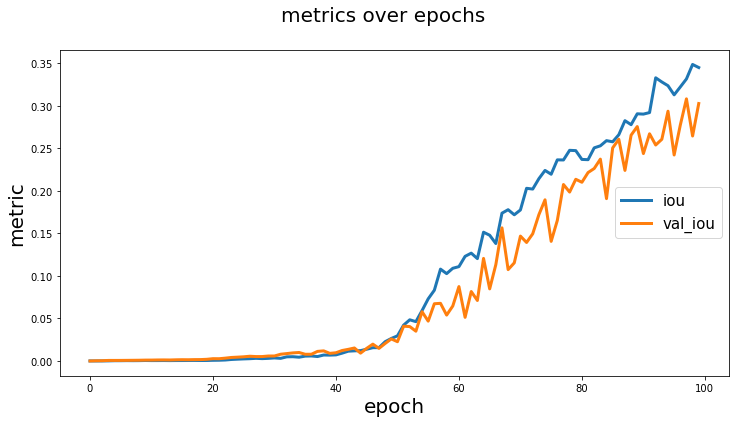

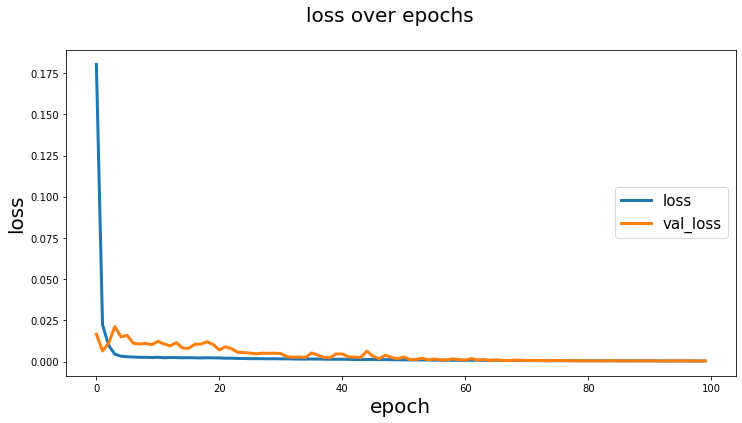

In [23]:
from keras_unet.utils import plot_segm_history

plot_segm_history(history)

In [24]:
y_pred = model.predict(X_test)

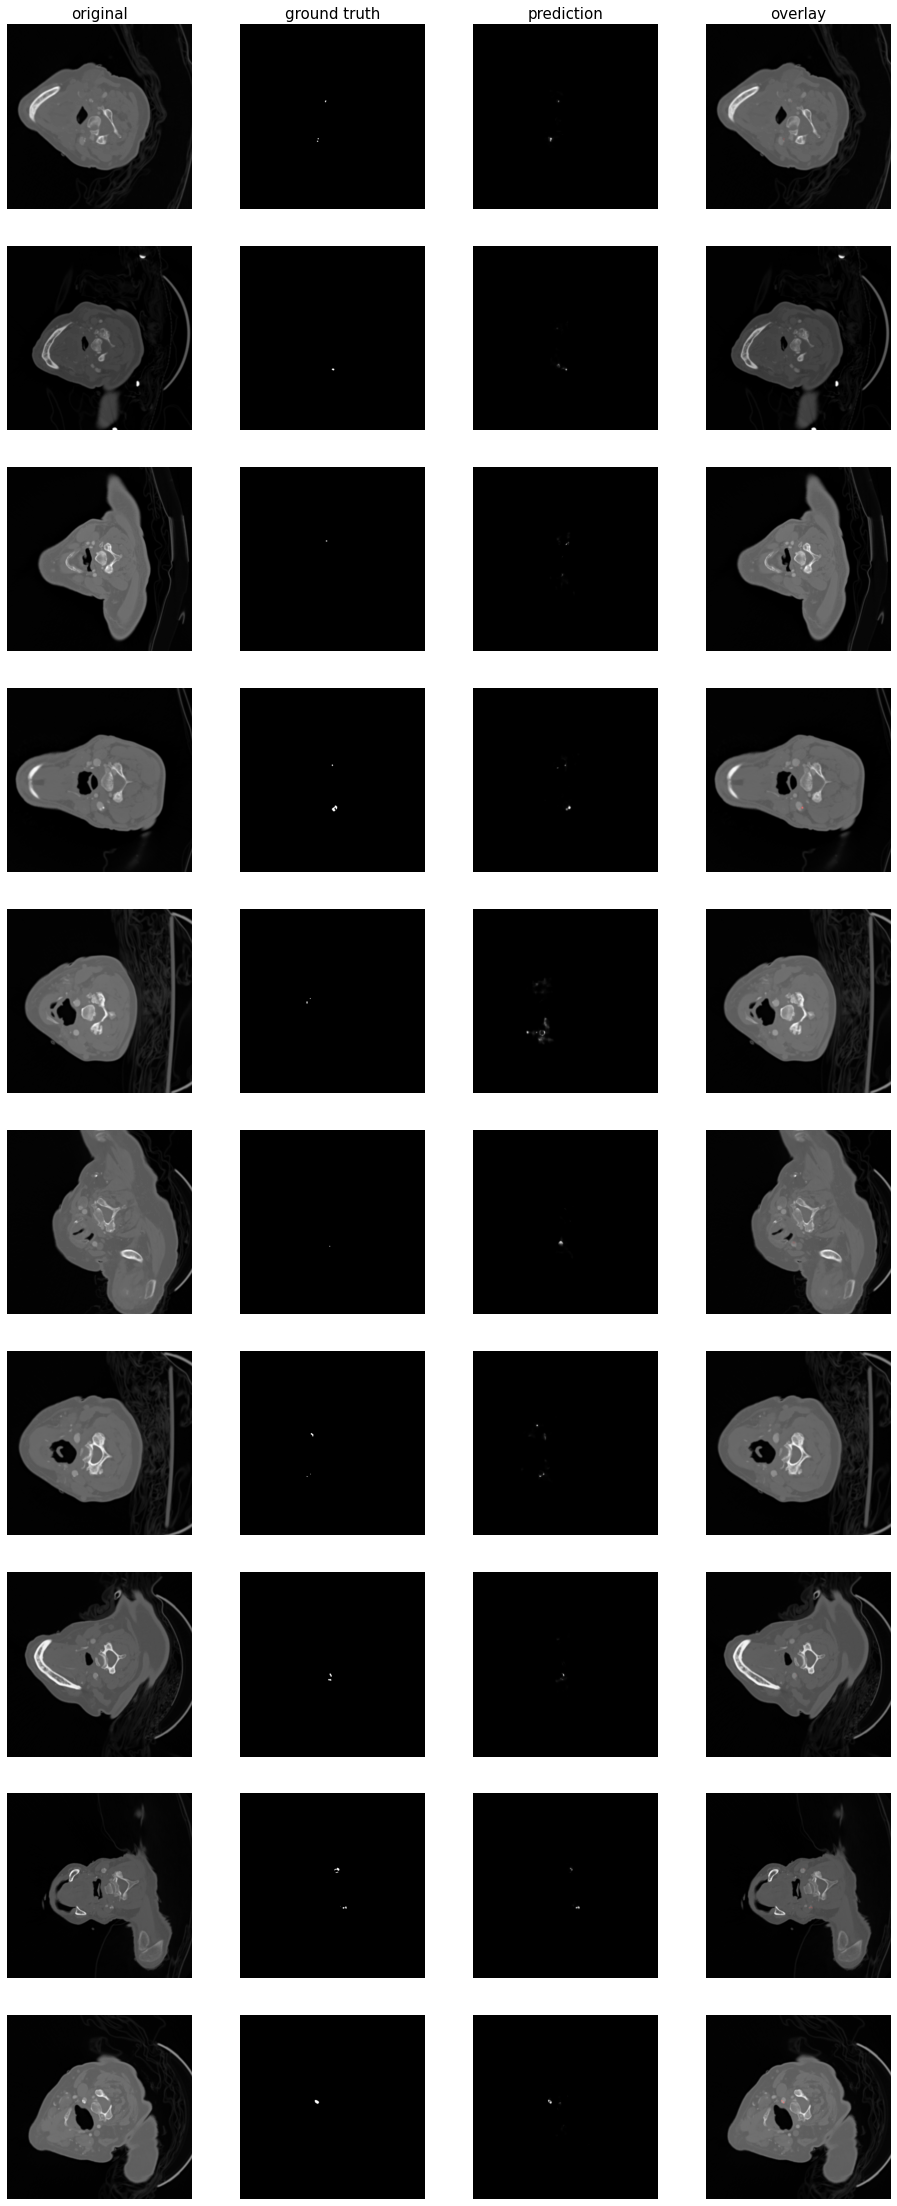

In [25]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=X_test, mask_imgs=y_test, pred_imgs=y_pred, nm_img_to_plot=10)

In [26]:
loss, iou, iou_thresholded = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 71ms/step - loss: 4.8168e-04 - iou: 0.3372 - iou_thresholded: 0.4670
